# UNSUPERVISED LEARNING ON CREDIT SCORE DATA

**OBJECTIVE: CLUSTER DATA TO IDENTIFY POTENTIAL PATTERNS RELATED TO CREDIT SCORES**

Steps Included in this Notebook:
* File Import & Data-Preprocessing
* Finding Optimal K using Silhouette score 
* Running kMeans for unsupervised modeling/clustering
* Deriving means of variables for each cluster to inspect differences for the clusters
* Running PCA to visualize clustering 
* Insights on output 

Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer





Create dataframe with the preprocessed dataset

In [2]:
df = pd.read_csv('C:\\Users\\rajih\\OneDrive\\Documents\\GitHub\\E-commerce_Promotion_Analysis\\Datasets\\feature_library.csv')
df.shape

(100000, 62)

Selecting relevant columns

In [3]:
num_columns = df.select_dtypes(include=['int64', 'float', 'uint8']).columns
selected_columns = list(num_columns) + ['Credit_Score']
df2 = df[selected_columns]
zscore_columns = [col for col in df2.columns if 'Zscore' in col or 'zscore' in col]

#drop outlier test 
df2 = df2.drop(columns=zscore_columns, errors='ignore')
print(f"Dropped columns: {zscore_columns}")

Dropped columns: ['income_zscore', 'Delay_Zscore']


Preprocess for Kmeans

In [4]:
#need to encode credit_score
df2 = pd.get_dummies(df2, columns=['Credit_Score'], prefix='Credit_Score')

In [5]:
# scale
X = df2.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Find Optimal K

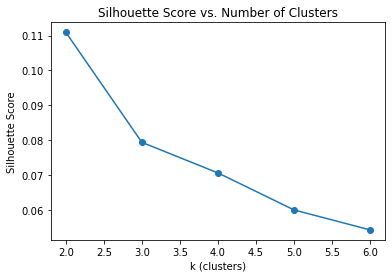

In [77]:
k_range = range(2, 7)  
sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("k (clusters)")
plt.ylabel("Silhouette Score")
plt.show()

Highest  silhouette score at k =2, indicating the best cluster separation.

In [78]:
# Identify best k ( highest silhouette)
best_k = k_range[np.argmax(sil_scores)]
print(f"Best k by silhouette score = {best_k} (Score={max(sil_scores):.4f})")

Best k by silhouette score = 2 (Score=0.1109)


Fitting K-Mean & adding cluster labels back

In [79]:
#Fit K-Means with best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to df2
df2["Cluster"] = labels_final



Variable Means for both clusters to show how variables behave in both

In [80]:
# Check cluster means
cluster_means = df2.groupby("Cluster").mean()
print("\nCluster Means:\n", cluster_means)


Cluster Means:
                Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Cluster                                                                       
0        29.841512   34785.740617            2823.137295           7.212323   
1        36.151965   64394.107825            4794.844102           4.118456   

         Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
Cluster                                                                     
0               6.851063      22.023458     5.621338            31.546271   
1               4.661617       9.265887     2.036411            13.551130   

         Num_of_Delayed_Payment  Changed_Credit_Limit  ...  \
Cluster                                                ...   
0                     17.295289             13.293781  ...   
1                     10.599787              7.543075  ...   

         Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
Cluster                                          

Run PCA for plotting & seeing cluster segmentation

In [6]:
# PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


PCA Loading

In [ ]:
# Create a DataFrame of PCA loadings 
loadings_df = pd.DataFrame(
    pca.components_,
    columns=df2.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print("\nPCA Loadings:")
display(loadings_df)

# Identify the top contributing features 
for i in range(pca.n_components_):
    component_loadings = loadings_df.iloc[i]
    sorted_loadings = component_loadings.abs().sort_values(ascending=False)
    top_features = sorted_loadings.head(5).index
    print(f"\nTop 5 features contributing to {loadings_df.index[i]}: {list(top_features)}")


PCA Loadings (each row is a PC, each column is a feature):


Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
PC1 -0.099589      -0.125262              -0.151779           0.228809   
PC2 -0.030245       0.365856               0.434171           0.002903   

     Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
PC1         0.192277       0.267269     0.275040             0.239943   
PC2         0.039228       0.035634     0.175375             0.053137   

     Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Standard  \
PC1                0.233973              0.176305  ...             0.015500   
PC2                0.000018              0.023002  ...            -0.151673   

     Payment_of_Min_Amount_Yes  \
PC1                   0.268457   
PC2                  -0.012688   

     Payment_Behaviour_High_spent_Medium_value_payments  \
PC1                                          -0.025275    
PC2                                           0.116827    

     Payment_Behaviour_High_spent_Small_value_payments  \
PC1                                          -0.001604   
PC2                                           0.014288   

     Payment_Behaviour_Low_spent_Large_value_payments  \
PC1                                          0.001384   
PC2                                         -0.022382   

     Payment_Behaviour_Low_spent_Medium_value_payments  \
PC1                                          -0.002285   
PC2                                           0.020371   

     Payment_Behaviour_Low_spent_Small_value_payments  Credit_Score_Good  \
PC1                                          0.063175          -0.160610   
PC2                                         -0.222247           0.051239   

     Credit_Score_Poor  Credit_Score_Standard  
PC1           0.155797              -0.018477  
PC2           0.064407              -0.097871  

[2 rows x 56 columns]


Top 5 features contributing to PC1: ['Num_of_Loan', 'Payment_of_Min_Amount_Yes', 'Interest_Rate', 'Outstanding_Debt', 'Credit_Mix_Good']

Top 5 features contributing to PC2: ['Total_EMI_per_month', 'Monthly_Inhand_Salary', 'Monthly_Inhand_Salary_log', 'Annual_Income', 'Monthly_Balance']


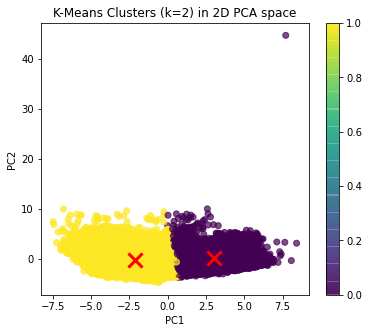

    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0          19114            1824.843333                  3   
1  23.0          19114            3093.745000                  3   
2  23.0          19114            3093.745000                  3   
3  23.0          19114            3093.745000                  3   
4  23.0          19114            1824.843333                  3   
5  23.0          19114            3093.745000                  3   
6  23.0          19114            1824.843333                  3   
7  23.0          19114            1824.843333                  3   
8  28.0          34847            3037.986667                  2   
9  28.0          34847            3037.986667                  2   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3            4                    3   
1                4              3            4                   -1   
2                4              3     

In [ ]:

# Plot clusters in 2D PCA space
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_final, cmap="viridis", alpha=0.7)
plt.colorbar(scatter)
plt.title(f"K-Means Clusters (k={best_k}) in 2D PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot cluster centers in PCA space (transform original centers)
centers = kmeans_final.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:,0], centers_pca[:,1],
            marker='x', s=200, linewidths=3, color='r', zorder=10)
plt.show()

# 8. Inspect final results
print(df2.head(10))


# Insights 

K-means clustering (K=2) effectively divides credit card users into two distinct segments based on financial health, visualized in a 2D space created by Principal Component Analysis (PCA).

**Cluster 0 (Lower Income, Higher Risk):** 

 This cluster is younger, has lower income, more bank accounts/credit cards, higher interest rates, more loans, higher delay from due dates and delayed payments, and changed credit limits. They almost always pay the minimum amount, have a mix of payment behaviors, and are more likely to have a "Poor" or "Standard" credit score.

PCA Indication: Located on the left in PCA space (negative PC1), indicating lower values for features that positively load onto PC1. Given our PCA loadings (more loans, higher likelihood of minimum payments, etc. load positively), this implies lower financial responsibility.

**Cluster 1 (Higher Income, Lower Risk):**

This cluster is older, has higher income, fewer bank accounts/credit cards, lower interest rates, fewer loans, lower delay from due dates and delayed payments, and changed credit limits. They less frequently pay the minimum amount, exhibit a mix of payment behaviors, and are more likely to have a "Standard" or "Good" credit score.

PCA Indication: Located on the right in PCA space (positive PC1), indicating higher values for features that positively load onto PC1. This signifies more responsible financial behavior.